In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [2]:
# =================================================-
#### Slide 3: Loading packages  ####

from pathlib import Path

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
main_dir = Path.home() / "maptv" / "Classification-with-Python"

In [4]:
main_dir / "data"

PosixPath('/Users/maptv/maptv/Classification-with-Python/data')

In [5]:
main_dir = Path.cwd().parent
data_dir = main_dir / "data"

In [6]:
# =================================================-
#### Slide 4: Load data into Python  ####

df = pd.read_csv(data_dir / "healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# =================================================-
#### Slide 5: Subset data  ####

# df = df.drop(columns="bmi")
# df.head()

In [8]:
# =================================================-
#### Slide 6: Convert target to binary  ####

df["stroke"].unique()

array([1, 0])

In [9]:
# =================================================-
#### Slide 9: The data at first glance  ####

# The first 3 rows.
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [10]:
# The data types.
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

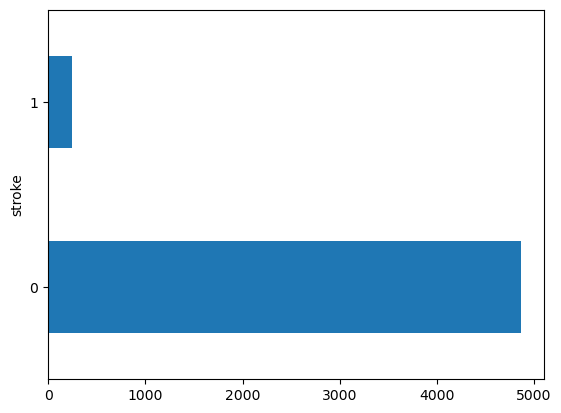

In [11]:
df["stroke"].value_counts().plot.barh();

In [12]:
df["stroke"].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [13]:
# =================================================-
#### Slide 10: Data prep: check for NAs  ####

# Check for NAs.
df.isna().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [14]:
# =================================================-
#### Slide 11: Data prep: check for NAs  ####

percent_missing = df.isna().mean() * 100
percent_missing

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.933464
smoking_status       30.215264
stroke                0.000000
dtype: float64

In [15]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [16]:
df["smoking_status"]

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109                NaN
Name: smoking_status, Length: 5110, dtype: object

In [17]:
df = df.set_index("id")

In [18]:
dummy_df = pd.get_dummies(df, columns=df.select_dtypes("object").columns)
dummy_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
51676,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
31112,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
60182,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,NaN,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
44873,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
19723,35.0,0,0,82.99,30.6,0,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
dummy_df = pd.DataFrame(
    imputer.fit_transform(dummy_df), columns=dummy_df.columns, index=df.index
)

In [20]:
dummy_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0.0,1.0,228.69,36.60,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
51676,61.0,0.0,0.0,202.21,32.56,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31112,80.0,0.0,1.0,105.92,32.50,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
60182,49.0,0.0,0.0,171.23,34.40,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1665,79.0,1.0,0.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1.0,0.0,83.75,27.84,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
44873,81.0,0.0,0.0,125.20,40.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
19723,35.0,0.0,0.0,82.99,30.60,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
df.loc[1665]

gender                      Female
age                           79.0
hypertension                     1
heart_disease                    0
ever_married                   Yes
work_type            Self-employed
Residence_type               Rural
avg_glucose_level           174.12
bmi                           24.0
smoking_status        never smoked
stroke                           1
Name: 1665, dtype: object

In [22]:
# =================================================-
#### Slide 12: Data prep: check for NAs  ####

dummy_df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [23]:
# =================================================-
#### Slide 13: Data prep: ready for kNN  ####

df["stroke"].dtypes

dtype('int64')

In [24]:
# Split the data into X and y
X = dummy_df.drop(columns="stroke")
y = dummy_df["stroke"]

In [25]:
# =================================================-
#### Slide 14: Data prep: numeric variables  ####

In [26]:
# =================================================-
#### Slide 20: Train and test: small scale before n-fold  ####

# Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
ss = StandardScaler()

In [28]:
X_train.iloc[:, :5] = ss.fit_transform(X_train.iloc[:, :5])

In [29]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
68371,0.608843,-0.330374,-0.238161,0.638258,0.008064,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22706,-1.886989,-0.330374,-0.238161,-0.386663,-1.755984,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8175,-1.036663,-0.330374,-0.238161,-0.466196,-1.107437,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
66065,-1.347974,-0.330374,-0.238161,0.697358,-1.405769,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
61291,-0.680878,-0.330374,-0.238161,1.401291,-0.238384,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56855,0.119639,-0.330374,-0.238161,0.704389,0.034006,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
72451,0.075165,-0.330374,-0.238161,-0.922303,0.384221,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9262,-0.547458,-0.330374,-0.238161,-0.647013,0.851175,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
68371,0.608843,-0.330374,-0.238161,0.638258,0.008064,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22706,-1.886989,-0.330374,-0.238161,-0.386663,-1.755984,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8175,-1.036663,-0.330374,-0.238161,-0.466196,-1.107437,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
66065,-1.347974,-0.330374,-0.238161,0.697358,-1.405769,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
61291,-0.680878,-0.330374,-0.238161,1.401291,-0.238384,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56855,0.119639,-0.330374,-0.238161,0.704389,0.034006,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
72451,0.075165,-0.330374,-0.238161,-0.922303,0.384221,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9262,-0.547458,-0.330374,-0.238161,-0.647013,0.851175,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
X_test.iloc[:, :5] = ss.transform(X_test.iloc[:, :5])

In [32]:
# =================================================-
#### Slide 22: Data prep: scaling variables  ####

# Scale X.
X_train.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
68371,0.608843,-0.330374,-0.238161,0.638258,0.008064,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22706,-1.886989,-0.330374,-0.238161,-0.386663,-1.755984,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [33]:
X_test.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
49833,-0.058254,-0.330374,-0.238161,0.159741,1.058710,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
20375,1.542778,-0.330374,-0.238161,-0.602413,0.137773,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [34]:
#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [35]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [36]:
# =================================================-
#### Slide 5: kNN: build model  ####

# Create kNN classifier.
kNN = KNeighborsClassifier()
# Fit the classifier to the data.
kNN.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# =================================================-
#### Slide 6: kNN: predict on a test set  ####

predictions = kNN.predict(X_test)
predictions[:5]

array([0., 0., 0., 0., 0.])

In [38]:
# =================================================-
#### Slide 7: kNN: predict on test  ####

actual_v_predicted = np.column_stack((y_test, predictions))
actual_v_predicted[:5]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [39]:
# =================================================-
#### Slide 18: Confusion matrix in python  ####

# Confusion matrix for kNN.
cm_kNN = metrics.confusion_matrix(y_test, predictions)
cm_kNN

array([[1444,    6],
       [  83,    0]])

In [40]:
ss

StandardScaler()

In [41]:
ss.var_

array([5.05597324e+02, 8.87226494e-02, 5.07951236e-02, 2.07167981e+03,
       5.94370040e+01])

In [42]:
ss.scale_

array([22.4854914 ,  0.29786347,  0.22537774, 45.5157095 ,  7.7095398 ])

In [43]:
round(metrics.accuracy_score(y_test, predictions), 4)

0.9419

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
# =================================================-
#### Slide 19: Confusion matrix: visualize  ####

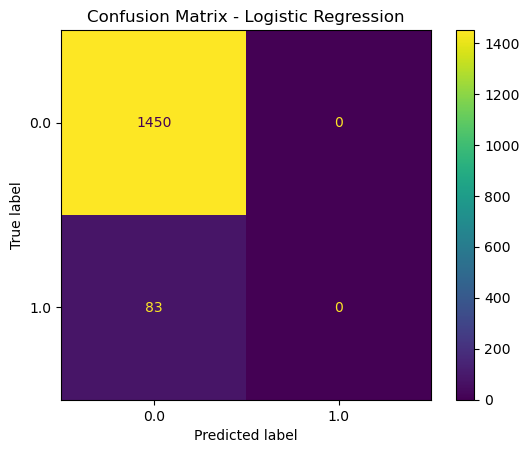

In [47]:
cmd = metrics.ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression");

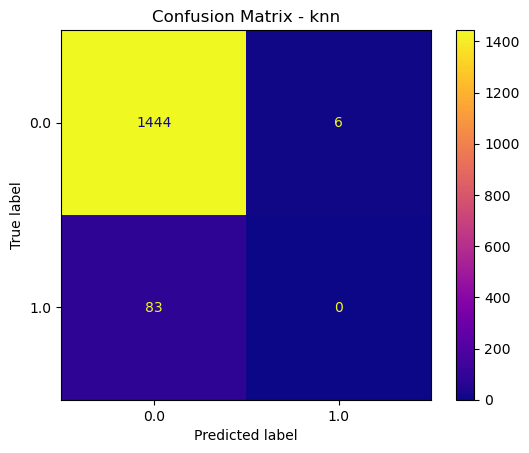

In [48]:
cmd = metrics.ConfusionMatrixDisplay.from_estimator(kNN, X_test, y_test, cmap="plasma")
plt.title("Confusion Matrix - knn");

In [49]:
# =================================================-
#### Slide 20: Evaluation of kNN with k neighbors  ####

# Create a dictionary with accuracy values for our kNN model with k.
model_final_dict = {
    "metrics": ["accuracy"],
    "values": [round(metrics.accuracy_score(y_test, predictions), 4)],
    "model": ["kNN_k"],
}
model_final = pd.DataFrame(data=model_final_dict)
model_final

,metrics,values,model
0,accuracy,0.9419,kNN_k


In [50]:
perf_df = pd.DataFrame(
    metrics.classification_report(y_test, predictions, output_dict=True)
).T.assign(model="knn")

In [51]:
perf_df

,precision,recall,f1-score,support,model
0.0,0.945645,0.995862,0.970104,1450.000000,knn
1.0,0.000000,0.000000,0.000000,83.000000,knn
accuracy,0.941944,0.941944,0.941944,0.941944,knn
macro avg,0.472823,0.497931,0.485052,1533.000000,knn
weighted avg,0.894446,0.941944,0.917581,1533.000000,knn


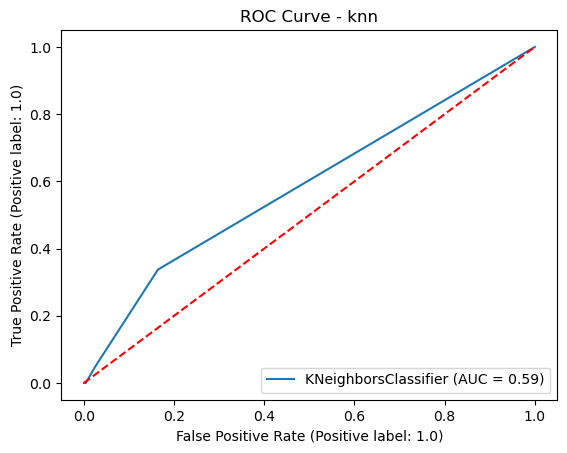

In [52]:
# =================================================-
#### Slide 24: Plot ROC and calculate AUC  ####

rcd = metrics.RocCurveDisplay.from_estimator(kNN, X_test, y_test)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC Curve - knn");

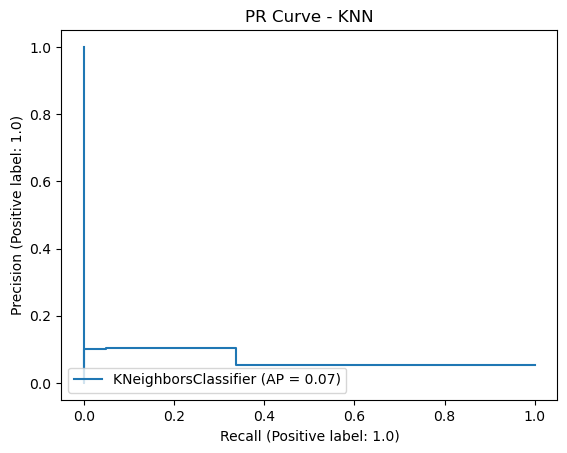

In [53]:
prd = metrics.PrecisionRecallDisplay.from_estimator(kNN, X_test, y_test)
plt.title("PR Curve - KNN");

In [54]:
rcd.roc_auc

0.5862733693394266

In [55]:
prd.average_precision

0.07113418138513472

In [56]:
#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [57]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 4 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [58]:
# =================================================-
#### Slide 6: Cross-validation pipeline for optimal accuracy  ####

# Create a pipeline of the scaler and Estimator
cv_pipeline = Pipeline([("scaler", StandardScaler()), ("knn", kNN)])

In [59]:
# =================================================-
#### Slide 7: Cross-validation for optimal accuracy  ####

# Calculate cv scores
cv_scores = cross_val_score(
    cv_pipeline, X, y, scoring=metrics.make_scorer(metrics.f1_score)
)

In [60]:
# =================================================-
#### Slide 8: Cross-validation for optimal accuracy  ####

# Print each cv score (accuracy) and average them.
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Mean cv score is:", round(mean, 4))


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

[0.07407407 0.         0.07407407 0.07272727 0.03773585]
cv_scores mean:0.05172225398640493
Mean cv score is: 0.0517


In [61]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 5 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [62]:
# =================================================-
#### Slide 5: Finding optimal k - GridSearchCV  ####

# Define the parameter values that should be searched.
k_range = range(1, 31)

# Create a parameter grid: map the parameter names to the values that should be searched by building a Python dictionary.
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# Instantiate the grid using our original model - kNN with k.
grid = GridSearchCV(kNN, param_grid, cv=10, scoring="f1")

{'n_neighbors': range(1, 31)}


In [63]:
# =================================================-
#### Slide 6: Finding optimal k - GridSearchCV  ####

# Create a pipeline of the scaler and gridsearch
grid_search_pipeline = Pipeline(
    [("transformer", StandardScaler()), ("estimator", grid)]
)

# Fit Gridsearch pipeline
grid_search_pipeline.fit(X, y)

Pipeline(steps=[('transformer', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': range(1, 31)},
                              scoring='f1'))])

In [64]:
cv_df = pd.DataFrame(grid.cv_results_)

In [65]:
grid.cv_results_["mean_test_score"]

array([0.10375183, 0.00740741, 0.05175757, 0.03789174, 0.05810338,
       0.03791209, 0.0450346 , 0.00769231, 0.03076923, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00769231, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [66]:
cv_df["mean_test_score"]

0     0.103752
1     0.007407
2     0.051758
3     0.037892
4     0.058103
5     0.037912
6     0.045035
7     0.007692
8     0.030769
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.007692
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
Name: mean_test_score, dtype: float64

In [67]:
# =================================================-
#### Slide 7: Finding optimal k - view results  ####

# View the complete results (list of named tuples).
print(grid.cv_results_["mean_test_score"])

[0.10375183 0.00740741 0.05175757 0.03789174 0.05810338 0.03791209
 0.0450346  0.00769231 0.03076923 0.         0.         0.
 0.         0.         0.         0.         0.00769231 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [68]:
# =================================================-
#### Slide 8: Finding optimal k  ####

# Create a list of the mean scores only by using a list comprehension to loop through grid.cv_results_.

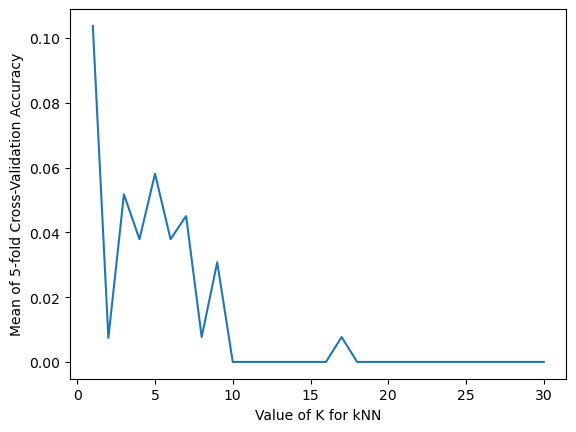

In [69]:
# =================================================-
#### Slide 9: Finding optimal k - plot  ####

# Plot the results.
plt.plot(k_range, grid.cv_results_["mean_test_score"])
plt.xlabel("Value of K for kNN")
plt.ylabel("Mean of 5-fold Cross-Validation Accuracy");

In [70]:
# =================================================-
#### Slide 10: Define and examine the optimized model   ####

# Single best score achieved across all params (k).
print(grid.best_score_)
grid_score = grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(grid.best_params_)

# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print(grid.best_estimator_)

0.10375182755385366
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [71]:
# =================================================-
#### Slide 11: Add GridSearchCV score to the final scores  ####

In [72]:
grid

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='f1')

In [73]:
pred = grid.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/py/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [74]:
knn = KNeighborsClassifier(n_neighbors=1)

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
perf_df = perf_df.assign(model="knn5")

In [77]:
pred = knn.predict(X_test)

In [78]:
perf_df = pd.concat(
    [
        pd.DataFrame(metrics.classification_report(y_test, pred, output_dict=True)).T.assign(
            model="knn1"
        ),
        perf_df,
    ]
)

In [79]:
# =================================================-
#### Slide 12: Optimal model and final thoughts  ####

In [80]:
perf_df

,precision,recall,f1-score,support,model
0.0,0.946765,0.968966,0.957737,1450.000000,knn1
1.0,0.081633,0.048193,0.060606,83.000000,knn1
accuracy,0.919113,0.919113,0.919113,0.919113,knn1
macro avg,0.514199,0.508579,0.509171,1533.000000,knn1
weighted avg,0.899925,0.919113,0.909164,1533.000000,knn1
0.0,0.945645,0.995862,0.970104,1450.000000,knn5
1.0,0.000000,0.000000,0.000000,83.000000,knn5
accuracy,0.941944,0.941944,0.941944,0.941944,knn5
macro avg,0.472823,0.497931,0.485052,1533.000000,knn5
weighted avg,0.894446,0.941944,0.917581,1533.000000,knn5


In [81]:
# =================================================-
#### Slide 14: Final Model   ####

perf_df.to_pickle(data_dir / "knn-tuning.pkl")

In [82]:
joblib.dump(grid_search_pipeline, data_dir / "gscv-pipeline-knn.pkl")

['/Users/maptv/maptv/Classification-with-Python/data/gscv-pipeline-knn.pkl']

In [83]:
# =================================================-
#### Slide 18: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################